# 1. Titanic (Regression)<br>
https://www.kaggle.com/c/titanic/overview<br>
출력을 csv파일로 저장하여 함께 제출<br>
submit predictions에 테스트해 볼 것!<br>
어떠한 알고리즘을 사용하여도 무방함<br>
참조: https://www.kaggle.com/alexisbcook/getting-started-with-titanic

train dataset 으로 learning 후 test dataset 으로 정확도 확인

In [1]:
import numpy as np 
import pandas as pd
import re as re
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')
full_data = [train_df, test_df]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId 승객번호<br>
Survived 생존<br>
Pclass 좌석등급<br>
Name 이름<br>
Sex 성별<br>
Age 나이<br>
SibSp 형제/배우자 수<br>
Parch 부모/자녀 수<br>
Ticket 티켓 번호<br>
Fare 티켓 요금<br>
Cabin 반 번호<br>
Embarked 항구 이름<br>
Pclass, Sex, Age, SibSp, Parch, Fare 정도가 생존 여부에 중요하게 작용했을 거 같다<br>

# Pclass

In [5]:
print(train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


특등석, 일등석, 이등석 순으로 생존확률이 다른 걸 확인

# Sex

In [6]:
print(train_df[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


여자의 경우가 생존확률이 높음

# SibSp & Parch (Family size)

In [7]:
print(train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [8]:
print(train_df[["Parch","Survived"]].groupby(['Parch'],as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


In [9]:
for dataset in full_data: # train, test 모두 적용
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # 가족 수 = 동반 부모/자식 + 동반 형제/배우자 + 본인 
print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


동반한 가족 수에 따라 생존확률이 다름

# Embarked

In [10]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


승선한 항구가 C 일 경우 생존확률이 높음

# Fare

In [11]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


지불한 비용을 4등분 하여 생존확률 비교(5등분 이상으로 나눌 경우 생존확률이 비슷한 그룹이 생김),<br> 
돈을 많이 낼 수록 생존확률 증가(Pclass 와 연관 있을 걸로 추정)

# Age

In [12]:
for dataset in full_data:
    age_avg = dataset['Age'].mean() # 평균
    age_std = dataset['Age'].std() # 편차
    age_null_count = dataset['Age'].isnull().sum() # 누락항 갯수
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count) # 나이 누락은 평균-편차, 평균+편차 사이 정수로 임의로 설정
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 10)

print (train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0   (-0.08, 8.0]  0.666667
1    (8.0, 16.0]  0.403509
2   (16.0, 24.0]  0.355263
3   (24.0, 32.0]  0.356828
4   (32.0, 40.0]  0.381250
5   (40.0, 48.0]  0.341176
6   (48.0, 56.0]  0.466667
7   (56.0, 64.0]  0.375000
8   (64.0, 72.0]  0.000000
9   (72.0, 80.0]  0.500000


<ipython-input-12-ca59a84f0f4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


# Title

In [13]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train_df['Title'], train_df['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


호칭 분류(결혼 유무, 직업, 나이 추정)

In [14]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Major', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0      Dr  0.428571
1  Master  0.575000
2    Miss  0.702703
3      Mr  0.156673
4     Mrs  0.793651
5    Rare  0.500000
6     Rev  0.000000


10명 이하인 호칭은 Rare 로 분류, 호칭에 따라 생존확률 다름. 성인남성의 생존확률이 가장 낮음

In [15]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev":6, "Rare":7}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 64), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 3

# Feature Selection
drop_elements = ['PassengerId', 'Ticket', 'Cabin', 'Name', 'Parch'] # data 에서 필요없는 정보들 drop 
train = train_df.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test_df.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values

   Survived  Pclass  Sex  Age  SibSp  Fare  Embarked  FamilySize  Title
0         0       3    1    1      1     0         0           2      1
1         1       1    0    2      1     3         1           2      3
2         1       3    0    1      0     1         0           1      2
3         1       1    0    2      1     3         0           2      3
4         0       3    1    2      0     1         0           1      1
5         0       3    1    1      0     1         2           1      1
6         0       1    1    2      0     3         0           1      1
7         0       3    1    0      3     2         0           5      4
8         1       3    0    1      0     1         0           3      3
9         1       2    0    0      1     2         1           2      3


In [16]:
full_data = [train, test]
X = full_data[0][0:, 1:], # Pclass ~ Title 까지 
X_train = X[0]
y_train = full_data[0][0:, 0] # Survived
X_test = full_data[1][0:, 0:] # test 는 Survived 미포함
X_train, y_train, len(X_train), len(X_train[0]) # 891명 7개 정보

(array([[3, 1, 1, ..., 0, 2, 1],
        [1, 0, 2, ..., 1, 2, 3],
        [3, 0, 1, ..., 0, 1, 2],
        ...,
        [3, 0, 0, ..., 0, 4, 2],
        [1, 1, 1, ..., 1, 1, 1],
        [3, 1, 1, ..., 2, 1, 1]], dtype=int64),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0,

[0.8866442199775533, 0.8327721661054994, 0.8496071829405163, 0.797979797979798]


(<BarContainer object of 4 artists>, None)

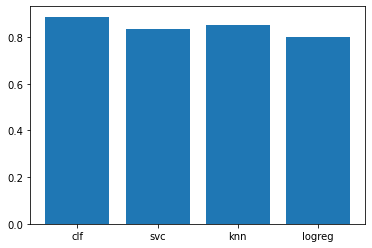

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

svc = SVC()
svc.fit(X_train,y_train)
score_svc = svc.score(X_train,y_train)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
score_clf = clf.score(X_train,y_train)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
score_knn = knn.score(X_train,y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score_logreg = logreg.score(X_train, y_train)

method = ['clf','svc','knn','logreg']
SCORE = [ score_clf, score_svc, score_knn, score_logreg ]
plt.bar(method, SCORE), print(SCORE)

In [18]:
y_pred=svc.predict(X_test) # test 데이터에서는 Support Vector Machines 가 RandomForest 보다 정확도가 더 높게 측정됨

submission = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":y_pred
})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [29]:
submission.to_csv('titanic_svc.csv',index=False)

주의! csv파일과 notebook 코드 모두를 제출하여야 한다.

# 2. Image classification with CNN 
cnn을 이용하여 다음 이미지를 분류하여라.\
인풋 데이터는 rgb 정보를 가지고 있다.\
코드, 결과, 보고서를 함께 제출하여야 한다.

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777) # gpu 사용

In [21]:
train_batch_size = 500
test_batch_size = 100

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=train_batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=test_batch_size,
    shuffle=False
)

classes = trainset.classes
classes,trainset,testset,len(train_loader), len(test_loader) # 이미지 분류 명칭, trainset, testset, trainset의

Files already downloaded and verified
Files already downloaded and verified


(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 100,
 100)

(<matplotlib.image.AxesImage at 0x1fbdb87b700>, torch.Size([3, 32, 32]))

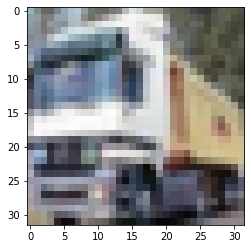

In [22]:
import matplotlib.pyplot as plt

images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0)), images.size() # [3, 32, 32]: 3 -> RGB, 32x32 

In [23]:
class cnn(nn.Module):
    def __init__(self):
        super(cnn,self).__init__()
        self.conv1 = nn.Conv2d(3, 24, 3, stride = 1, padding=1) # in_channels 3 (RGB), out_channels 24, kernel size = 3*3, stride = 1 (커널 연산 간격 한칸), padding = 1 (input 테두리에 0 값 삽임으로 연산 후 사이즈 맞추기)
        self.conv2 = nn.Conv2d(24, 48, 3, stride = 1, padding=1) # in_channels 24, out_channels 48, kernel size = 3*3, stride = 1, padding = 1
        self.conv3 = nn.Conv2d(48, 96, 3, stride = 1, padding=1) # in_channels 48, out_chennels 96, kernel size = 3*3, stride = 1, padding = 1
        self.fc1 = nn.Linear(4*4*96, 512) # input nodes 4*4*96 (max pooling 이후 4*4, convolution 이후 channel 96), hidden nodes 512
        self.fc2 = nn.Linear(512, 10) # hidden nodes 512, hidden nodes 10
        self.dropout = nn.Dropout(0.5) # random 으로 nodes 중 50% off 
        
    def forward(self, x):
        x = self.conv1(x) # x에 3*3 kernel 을 이용하여 convolution, channels 3 -> 24
        x = nn.functional.relu(x) # 활성화 함수 ReLU 적용
        x = nn.functional.max_pool2d(x,2) # kernel = 2, stride = 2 로 max pooling 하여 기존의 크기에서 1/2 크기로 resizing ( 32*32 -> 16*16 )
        x = self.conv2(x) # pooing 후 3*3 kernel 을 이용하여 convolution, channels 24 -> 48
        x = nn.functional.relu(x) # 활성화 함수 ReLU 적용
        x = nn.functional.max_pool2d(x,2) # kernel = 2, stride = 2, max pooling, resizing ( 16*16 -> 8*8 )
        x = self.conv3(x) # pooing 후 3*3 kernel 을 이용하여 convolution, channels 48 -> 96
        x = nn.functional.relu(x) # 활성화 함수 ReLU 적용
        x = nn.functional.max_pool2d(x,2) # kernel = 2, stride = 2, max pooling, resizing ( 8*8 -> 4*4 )
        
        x = torch.flatten(x,1) # x 선형으로 변환
        x = self.fc1(x) # input layer에 가중치 곱하여 hidden layer 
        x = nn.functional.relu(x) # hidden layer에 활성화 함수 ReLU 적용
        x = self.dropout(x) # hidden layer 50% random off
        x = self.fc2(x) # hidden layer 에서 가중치 곱하여 output layer 
        x = nn.functional.softmax(x,dim=1) # output layer에 활성화 함수 softmax 적용
        return x # x 반환
model = cnn().to(device)
model

cnn(
  (conv1): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1536, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [24]:
learning_rate = 0.0015 
criterion = nn.CrossEntropyLoss().to(device) # loss를 CrossEntropyLoss 로 설정
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam 방식으로 최적화, learning rate = 0.0015

In [25]:
def train_cnn(model, criterion, optimizer, data): # 학습 함수 정의
    model.train() # dropout = True
    for X,y in data: # 'data' 에서 X 와 y 추출
        X = X.to(device) 
        y = y.to(device) # X,y GPU 연산에 맞게 변환
        y_pred = model(X) # 예측값
        loss = criterion(y_pred,y) # CrossEntropyLoss 로 구한 예측값과 targets 의 차이
        
        optimizer.zero_grad() #  optimizer 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # 가중치 변환

In [26]:
def evaluation(model, criterion, optimizer, data): # loss, accuracy 측정 함수 정의
    model.eval() # 모든 요소 고려하여 측정하므로 dropout = False
    t_loss = 0
    accuracy = 0

    with torch.no_grad(): # 학습 필요없음
        for X, y in data: 
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            t_loss += criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1] # 가장 큰 index (예측결과)
            corrects = (prediction == y) # 예측 결과와 targets 일치 확인
            accuracy += corrects.sum().float() / float( y.size(0) ) # 총 일치 데이터 / 총 데이터 = 정확도
    return t_loss.item(), accuracy.item()

In [27]:
nums_epoch = 30 # 시행횟수
for epoch in range(nums_epoch+1):
    train_cnn(model, criterion, optimizer, train_loader)
    
    if(epoch%10 == 0):
        train_E, train_accu = evaluation(model, criterion, optimizer, train_loader)
        test_E, test_accu = evaluation(model, criterion, optimizer, test_loader)
        print(epoch, "train_loss =", train_E, "train_accu =", train_accu, "test_loss =", test_E, "test_accu =", test_accu)

0 train_loss = 209.81248474121094 train_accu = 35.64799499511719 test_loss = 208.9813690185547 test_accu = 36.560001373291016
10 train_loss = 179.7056884765625 train_accu = 66.61199951171875 test_loss = 182.8197479248047 test_accu = 63.21001052856445
20 train_loss = 170.34719848632812 train_accu = 76.03799438476562 test_loss = 176.7256622314453 test_accu = 69.25
30 train_loss = 164.26248168945312 train_accu = 82.06800842285156 test_loss = 173.00762939453125 test_accu = 73.12999725341797


In [28]:
# 항목당 정확도
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad(): # 학습 필요없음
    for X, y in test_loader: 
        X = X.to(device)
        y = y.to(device)
        y_pred = model(X)        
        predictions = y_pred.max(1)[1] # 가장 큰 index (예측결과)
        
        for label, prediction in zip(y, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class airplane is: 82.4 %
Accuracy for class automobile is: 85.7 %
Accuracy for class bird  is: 61.7 %
Accuracy for class cat   is: 49.5 %
Accuracy for class deer  is: 71.7 %
Accuracy for class dog   is: 65.5 %
Accuracy for class frog  is: 79.0 %
Accuracy for class horse is: 73.4 %
Accuracy for class ship  is: 84.6 %
Accuracy for class truck is: 77.8 %


### 주의! 자신의 코드에 대한 설명과 결과에 대한 해석을 보고서로 함께 작성
### 보고서는 코드 아래에 마크다운을 이용해서 작성할 것

CNN을 작성할 때, CIFAR10 데이터는 RGB 3 channels 가 포함된 데이터이므로, 첫번째 convolution 에서 3 channels 에서 24 channels 로 합성곱을 하였고,\
nn.Conv2d 를 통해 channel 확장을 2번 더 반복하여 최종적으로 96 channels 이 되게끔 만들었다.\
channel이 기존의 32배가 된 만큼 input nodes도 증가하여 연산이 늘어났으므로, kernel = 2, stride = 2 인 maxpooling 을 3번 반복하여\
32\*32 데이터를 4\*4 로 줄여서 연산수를 줄였다.\
Vanishing Gradient Problem 을 피하기 위해서 활성화 함수를 Sigmoid 함수를 쓰지 않고 ReLU 함수를 썼고,\
overfitting 발생을 막기 위하여 hidden layer에 dropout(0.5)를 넣었다.\
최종적으로 Softmax 함수를 통해 총합이 1이 되고 범위 [0,1]을 갖는 값들이 output 에 나오게 했고,\
여기서 최댓값이 prediction 이 된다. 그리고 작성한 CNN class 를 model 로 명명하고 GPU로 연산이 가능하게 했다.\
learning rate = 0.0015로 설정하고, criterion은 CrossEntropyLoss 로, optimizer는 Adam 방식으로 설정하였고,\
학습 함수 train_cnn 을 정의할 때 model.train() 으로 dropout 이 켜진 상태로 학습이 진행되게 작성하였다. \
batch_size의 data에서 X,y 를 추출하여 model(X)로 target과 비교하여 loss를 구할 값을 추출하고,\
criterion으로 설정한 CrossEntropyLoss을 통해 loss를 구하여 backpropagation 과정을 거쳐 변수를 조정해주는 학습 함수를 정의했다.\
학습 함수와는 별개로 오차와 정확도를 구하기 위해서 evaluation 함수를 정의해줬다. \
이 때 적용되는 CNN은 모든 뉴런을 계산하여 예측할 것이므로 dropout이 꺼진 상태로 작동하게끔 model.eval() 으로 작성하였고,\
학습을 위한 함수가 아니므로 연산을 줄이기 위해서 with torch.no_grad()를 작성하였다.\ 
학습한 모델로 예측한 값과 target의 값을 비교하여 t_loss 값을 정하였고, y_pred 중 가장 큰 index를 구하여 예측값을 구하고,\
예측값과 targets 을 비교하여 target 과 일치하는 총 갯수를 총 target 갯수로 나눠서 정확도를 구하였다.\
한 번의 epoch 에서 100개의 Iteration 이 있게 batch size를 설정하여서, 한번의 연산에서 가중치가 100번 업데이트 되게끔 했고,\
총 30번의 epoch 를 통해 test_accuracy = 73% 를 얻었다.\
\
최종적으로 classes 에 분류된 항목당 정확도를 구하는 코드를 통해 항목당 정확도를 구했다.\
몇 번 반복해서 시도해본 결과, 비행기, 자동차, 배, 트럭의 경우 항상 75% 이상의 정확도로 구분할 수 있었다.\
또한 개구리의 경우도 75% 전후의 높은 정확도로 구분할 수 있었는데, 이런 높은 정확도가 나온 배경은 특이한 형태가 원인으로 보인다.\
[사슴, 말] 과 [고양이,개] 두 분류는 유사한 형태로 인해 혼동되어 정확도에 영향을 끼치는 것으로 예상되고,\
새의 경우는 약 65% 정도로 좋지 않은 정확도를 유지했는데, 1만개의 데이터 중 새의 사진을 다 보진 않아서 정확히는 모르겠으나,\ 
날개를 펼친 모습이나, 날고 있는 모습, 가만히 있는 모습 등 여러 모습의 데이터가 있어서 정확히 분류가 되지 않은게 아닌가 추측한다.\
그러므로, 새를 분류하기 위한 정확도를 올리기 위해서는 더 많은 종류의 새 사진을 이용하여 학습을 할 필요가 있을 거라 보이고,\
개와 고양이나, 사슴과 말 같이 유사한 형태의 항목을 혼동없이 구분하기 위해서는 더 높은 해상도의 이미지를 사용하면 지금보다 훨씬 더 좋은 정확도로 구분할 수 있으리라 생각한다.
